
# KEN4258: Computational Statistics



Task: R2 [100 points]
R2 has a problem with datasets that have a large number of predictors with respect to the number
of observations. The purpose of this graded homework assignment is to learn about this problem and
provide a solution for it. To do that, follow these steps:
1) Create a Monte Carlo simulation to illustrate the problem. [25 points]
2) Provide a mathematical proof showing that the problem really exists. [25 points]
3) Propose a solution to address the problem. [25 points]
4) Find a real dataset to illustrate the problem and your fix. [25 points]



In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [107]:


def monte_carlo_simulation(num_samples, mean, std_dev,num_real_vars=5, MAX_NUM_VARIABLES=10):
    np.random.seed(42)  # For reproducibility

    r2_scores = []

    for i in range(10, MAX_NUM_VARIABLES):
        num_variables = i

        X = np.random.normal(mean, std_dev, (num_samples, num_variables))
        X_subset = X[:, :num_real_vars]
        
        coefficients = np.random.rand(num_real_vars)  # Random coefficients
        noise = np.random.normal(0, 1, num_samples)  # Random noise
            
        print('Subset shape:' + str(X_subset.shape))
        print('Coeffs shape:' + str(coefficients.shape))
        print("---------------------------------------------------")
        y = X_subset.dot(coefficients) + noise
        
        
        model = LinearRegression()
        model.fit(X, y)

        r2 = model.score(X, y)
        adjusted_r2 = calc_adjusted_r2(n=num_samples, p=num_variables, r2=r2)
        r2_scores.append([num_variables, r2,adjusted_r2])

        # print(f'Number of variables: {num_variables}')
        # print(f'R2 Score: {r2}')
        # print(f'Adjusted R2 Score: {adjusted_r2}')
        # print("---------------------------------------------------")

    return r2_scores

def calc_adjusted_r2(n,p,r2):
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    return adjusted_r2

results = monte_carlo_simulation(num_samples=100, mean=0, std_dev=1, MAX_NUM_VARIABLES=50)

Subset shape:(100, 5)
Coeffs shape:(5,)
---------------------------------------------------
Subset shape:(100, 5)
Coeffs shape:(5,)
---------------------------------------------------
Subset shape:(100, 5)
Coeffs shape:(5,)
---------------------------------------------------
Subset shape:(100, 5)
Coeffs shape:(5,)
---------------------------------------------------
Subset shape:(100, 5)
Coeffs shape:(5,)
---------------------------------------------------
Subset shape:(100, 5)
Coeffs shape:(5,)
---------------------------------------------------
Subset shape:(100, 5)
Coeffs shape:(5,)
---------------------------------------------------
Subset shape:(100, 5)
Coeffs shape:(5,)
---------------------------------------------------
Subset shape:(100, 5)
Coeffs shape:(5,)
---------------------------------------------------
Subset shape:(100, 5)
Coeffs shape:(5,)
---------------------------------------------------
Subset shape:(100, 5)
Coeffs shape:(5,)
----------------------------------------

NameError: name 'X_subset' is not defined

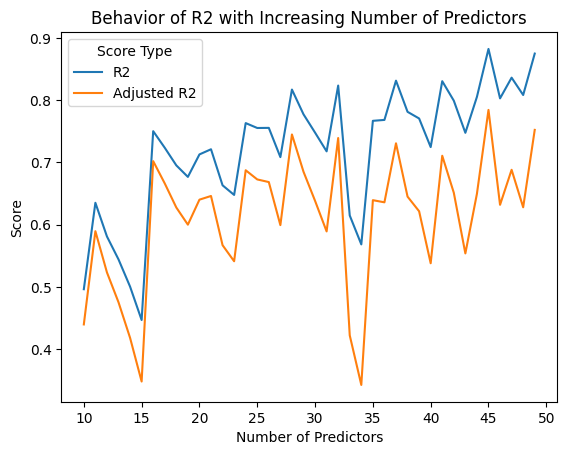

In [108]:
res_df = pd.DataFrame(results, columns=['num_variables', 'r2','adjusted_r2'])

sns.lineplot(data=res_df, x='num_variables', y='r2', label='R2')
sns.lineplot(data=res_df, x='num_variables', y='adjusted_r2', label='Adjusted R2')

plt.title('Behavior of R2 with Increasing Number of Predictors')
plt.xlabel('Number of Predictors')
plt.ylabel('Score')

plt.legend(title='Score Type')

plt.show()

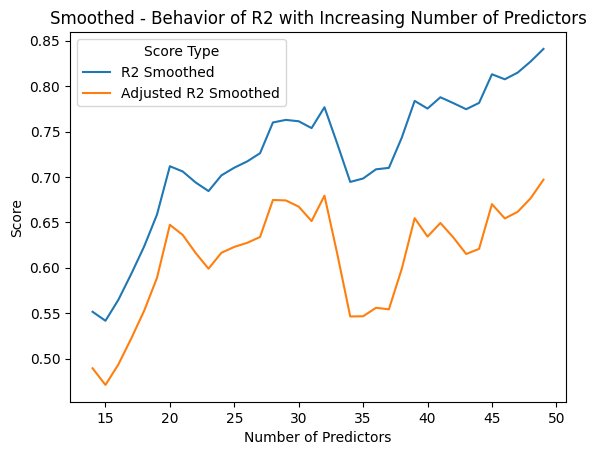

In [109]:
window_size = 5  

res_df['r2_smoothed'] = res_df['r2'].rolling(window=window_size).mean()
res_df['adjusted_r2_smoothed'] = res_df['adjusted_r2'].rolling(window=window_size).mean()

# Plot the smoothed data
sns.lineplot(data=res_df, x='num_variables', y='r2_smoothed', label='R2 Smoothed')
sns.lineplot(data=res_df, x='num_variables', y='adjusted_r2_smoothed', label='Adjusted R2 Smoothed')


plt.title('Smoothed - Behavior of R2 with Increasing Number of Predictors')
plt.xlabel('Number of Predictors')
plt.ylabel('Score')

plt.legend(title='Score Type')

